In [1]:
from google.colab import files

uploaded = files.upload()


Saving customer_support_tickets.csv to customer_support_tickets.csv


In [2]:
import pandas as pd

data = pd.read_csv("customer_support_tickets.csv")
data.head()



,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,22/03/2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,01/06/2023 12:15,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,22/05/2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,01/06/2023 16:45,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,14/07/2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,01/06/2023 11:14,01/06/2023 18:05,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,13/11/2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,01/06/2023 7:29,01/06/2023 1:57,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,04/02/2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,01/06/2023 0:12,01/06/2023 19:53,1.0


In [3]:
# Dataset basic info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [4]:
# Missing values check
data.isnull().sum()


,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


In [8]:
# Check all column names
print(data.columns)


Index(['Customer Age', 'Customer Gender', 'Product Purchased',
       'Date of Purchase', 'Ticket Type', 'Ticket Subject',
       'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority',
       'Ticket Channel', 'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# सर्व object type columns encode करणे
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])

# Check first 5 rows
data.head()


,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,32,2,16,509,4,13,3369,2,2769,0,3,193,1283,NaN
1,42,0,21,513,4,10,2004,2,2769,0,0,455,1283,NaN
2,48,2,10,324,4,8,189,0,343,2,3,133,461,3.0
3,27,0,25,308,0,0,1971,0,2549,2,3,1250,601,3.0
4,67,0,5,74,0,3,636,0,2657,2,1,12,550,1.0


In [10]:
# Input and output
X = data.drop('Customer Satisfaction Rating', axis=1)  # features
y = data['Customer Satisfaction Rating']               # target

# Check first 5 rows of X and y
X.head(), y.head()


(   Customer Age  Customer Gender  Product Purchased  Date of Purchase  \
 0            32                2                 16               509   
 1            42                0                 21               513   
 2            48                2                 10               324   
 3            27                0                 25               308   
 4            67                0                  5                74   
 
    Ticket Type  Ticket Subject  Ticket Description  Ticket Status  Resolution  \
 0            4              13                3369              2        2769   
 1            4              10                2004              2        2769   
 2            4               8                 189              0         343   
 3            0               0                1971              0        2549   
 4            0               3                 636              0        2657   
 
    Ticket Priority  Ticket Channel  First Response Time  Ti

In [11]:
from sklearn.model_selection import train_test_split

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5928, 13), (2541, 13), (5928,), (2541,))

In [14]:
from sklearn.preprocessing import StandardScaler

# Create scaler
scaler = StandardScaler()

# Fit on train data and transform both train and test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
# Remove rows with missing values
data = data.dropna()

# Check if any missing values left
data.isnull().sum()


,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0
Ticket Status,0
Resolution,0
Ticket Priority,0


In [18]:
X = data.drop('Customer Satisfaction Rating', axis=1)
y = data['Customer Satisfaction Rating']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:
from sklearn.metrics import accuracy_score, classification_report

# Prediction on test data
y_pred = model.predict(X_test)

# Check accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.18772563176895307
              precision    recall  f1-score   support

         1.0       0.17      0.15      0.16       168
         2.0       0.24      0.25      0.24       174
         3.0       0.20      0.22      0.21       175
         4.0       0.18      0.16      0.17       162
         5.0       0.15      0.15      0.15       152

    accuracy                           0.19       831
   macro avg       0.19      0.19      0.19       831
weighted avg       0.19      0.19      0.19       831



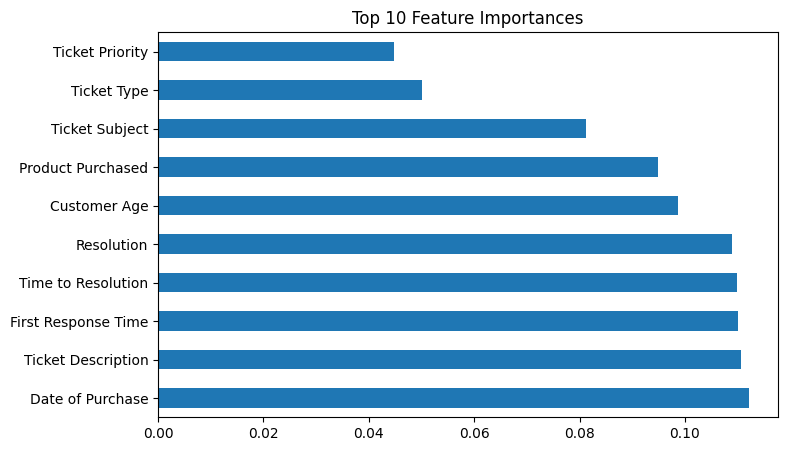

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from model
importances = model.feature_importances_

# Create a Series for easy plotting
feat_importances = pd.Series(importances, index=X.columns)

# Plot top 10 important features
feat_importances.nlargest(10).plot(kind='barh', figsize=(8,5))
plt.title("Top 10 Feature Importances")
plt.show()
